# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multilayer ANNs
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

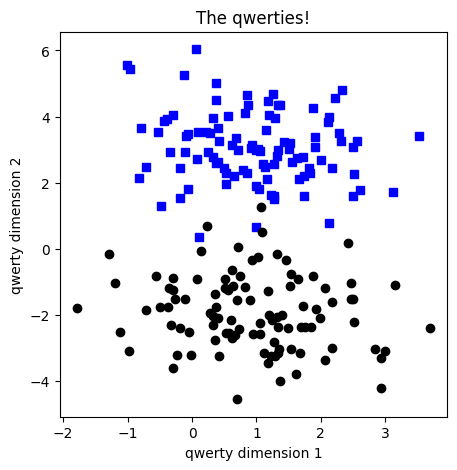

In [2]:
nPerClust = 100
blur = 1

A = [  1,  3 ]
B = [  1, -2 ]

a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions to build and train the model

In [3]:
def createANNmodel(learningRate):

  ANNclassify = nn.Sequential(
      nn.Linear(2,16),
      nn.ReLU(),
      nn.BatchNorm1d(16),
      nn.Linear(16,1),
      nn.ReLU(),
      nn.Linear(1,1),
      nn.Sigmoid(),
        )

  lossfun = nn.BCELoss()

  optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

  return ANNclassify,lossfun,optimizer

In [4]:
numepochs = 1000

def trainTheModel(ANNmodel):

  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    yHat = ANNmodel(data)

    loss = lossfun(yHat,labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  
  
  predictions = ANNmodel(data)
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())
  
  return losses,predictions,totalacc

# Test the new code by running it once

Final accuracy: 98.5%


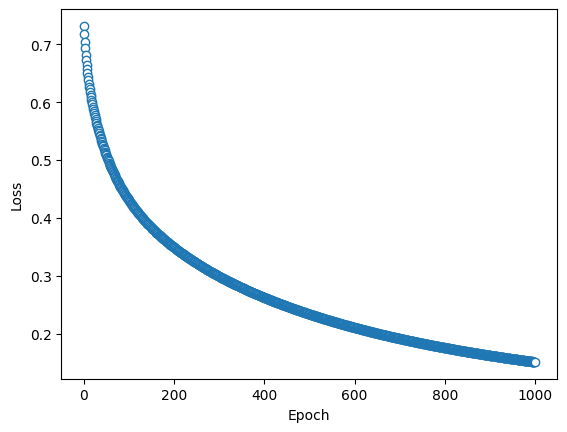

In [5]:
ANNclassify,lossfun,optimizer = createANNmodel(.01)

losses,predictions,totalacc = trainTheModel(ANNclassify)

print('Final accuracy: %g%%' %totalacc)


plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

# Now for the real test (varying learning rates)

In [6]:
learningrates = np.linspace(.001,.1,50)

accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))


for i,lr in enumerate(learningrates):
  
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()


C:\Users\litwi\AppData\Local\Temp\ipykernel_11228\1857254531.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


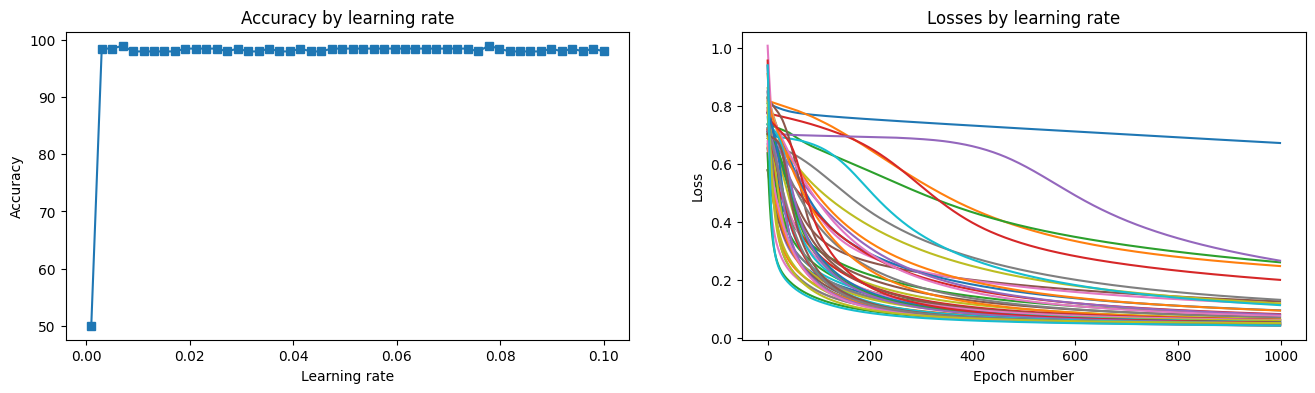

In [7]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [8]:
accByLR

[tensor(50.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(99.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.5000),
 tensor(98.),
 tensor(99.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.5000),
 tensor(98.),
 tensor(98.5000),
 tensor(98.)]

In [9]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.9800)